In [9]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
from pandas import read_csv

In [10]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Mall_Customers.csv')

In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [24]:
type(df)

pandas.core.frame.DataFrame

In [23]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Types of plots can be used

Stripplot
relplot
swamplot
box plot
violin plot
cat plot
boxen

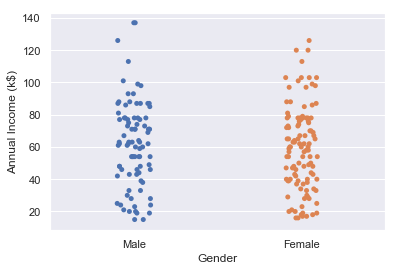

In [7]:
sns.set(style = "darkgrid")

plot = sns.stripplot(x = "Gender", y = "Annual Income (k$)", data = df)

In [509]:
Males = []
Females = []

for Gender in df['Gender']:
     if Gender == 'Male':
            Males.append(Gender)
            
     else:
        Females.append(Gender)  
        
print('Total No of males :',len(Males),'\n','Total No of Females',len(Females))

Total No of males : 88 
 Total No of Females 112


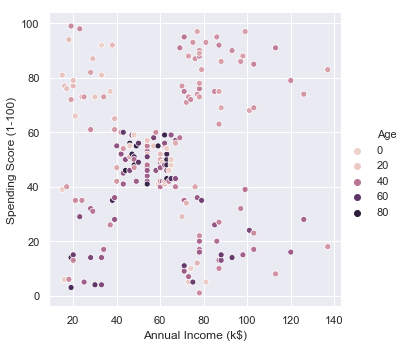

In [511]:
sns.set(style = "darkgrid")
plot = sns.relplot(x="Annual Income (k$)", y='Spending Score (1-100)',hue='Age',data=df)

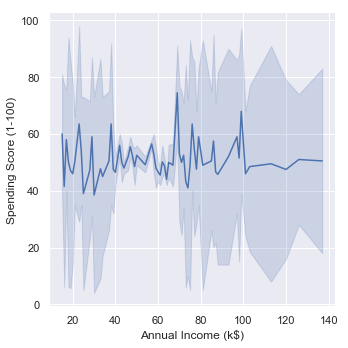

In [141]:

plot = sns.relplot(x="Annual Income (k$)", y='Spending Score (1-100)',kind = "line",data=df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


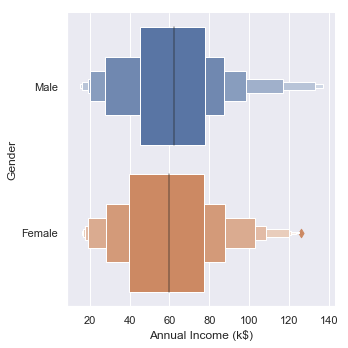

In [153]:
#this cat plot is used plot for categorical varibales
# by giving the parameter kind different plot can be analysed
sns.catplot(x="Annual Income (k$)",y="Gender",kind="boxen",data=df)


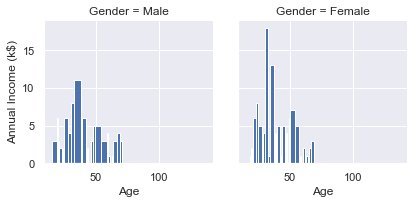

In [512]:
#this plotting helps to compare different features i.e shown below
# here we are comparing both searborn and matplotlib for visulization
b=sns.FacetGrid(df,col='Gender')
b.map(plt.hist,"Age","Annual Income (k$)")


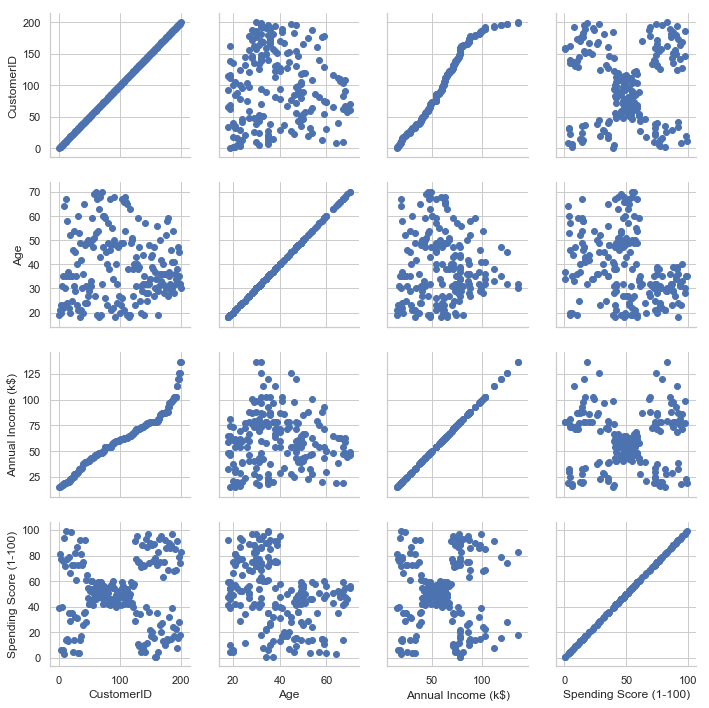

In [179]:
#this pair grid comapres with different features in data set
sns.set(style='whitegrid')
c=sns.PairGrid(df)
c.map(plt.scatter)

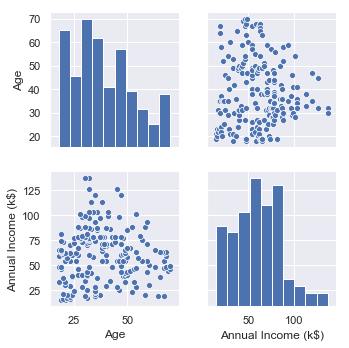

In [178]:
# also can be visuized by passing specif parameter as shown below
sns.pairplot(df[['Age','Gender',"Annual Income (k$)"]])

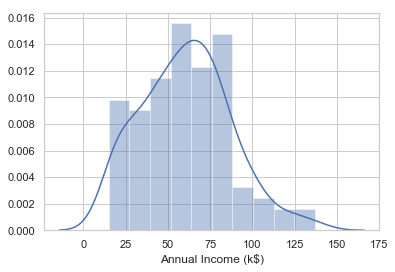

In [216]:
sns.distplot(df["Annual Income (k$)"]) # dist plot not appllicable for categoriacl variables
can be visulized only one feature at a time

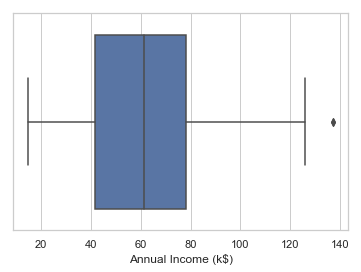

In [239]:
# detecting box plot or scstter plot to detect outlier
sns.boxplot(df['Annual Income (k$)']) # we can see at 140 anual income outlier

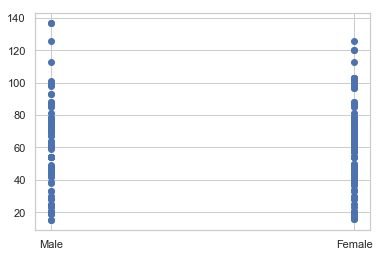

In [400]:
plt.scatter(x=df['Gender'],y=df['Annual Income (k$)'])

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <a list of 10 Patch objects>)

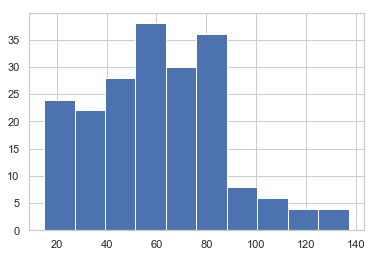

In [426]:
plt.hist(df['Annual Income (k$)'])

In [16]:
# removing outlier by giving the range lower and upper bound
lower_bound = 0.10
upper_bound = 0.95
res = df['Annual Income (k$)'].quantile([lower_bound,upper_bound])
res

0.10     23.9
0.95    103.0
Name: Annual Income (k$), dtype: float64

In [27]:
true_index = (res.loc[lower_bound] < df['Annual Income (k$)']) &\
             (df['Annual Income (k$)'] < res.loc[upper_bound])
df.values[true_index]


array([[21, 'Male', 35, 24, 35],
       [22, 'Male', 25, 24, 73],
       [23, 'Female', 46, 25, 5],
       [24, 'Male', 31, 25, 73],
       [25, 'Female', 54, 28, 14],
       [26, 'Male', 29, 28, 82],
       [27, 'Female', 45, 28, 32],
       [28, 'Male', 35, 28, 61],
       [29, 'Female', 40, 29, 31],
       [30, 'Female', 23, 29, 87],
       [31, 'Male', 60, 30, 4],
       [32, 'Female', 21, 30, 73],
       [33, 'Male', 53, 33, 4],
       [34, 'Male', 18, 33, 92],
       [35, 'Female', 49, 33, 14],
       [36, 'Female', 21, 33, 81],
       [37, 'Female', 42, 34, 17],
       [38, 'Female', 30, 34, 73],
       [39, 'Female', 36, 37, 26],
       [40, 'Female', 20, 37, 75],
       [41, 'Female', 65, 38, 35],
       [42, 'Male', 24, 38, 92],
       [43, 'Male', 48, 39, 36],
       [44, 'Female', 31, 39, 61],
       [45, 'Female', 49, 39, 28],
       [46, 'Female', 24, 39, 65],
       [47, 'Female', 50, 40, 55],
       [48, 'Female', 27, 40, 47],
       [49, 'Female', 29, 40, 42],
       [

In [28]:
# these are the values in quantile range . sctual values
df1 = df.values[true_index]
df1.shape

(168, 5)

In [29]:
# there are the outliers values

false_index = ~ true_index
false_index # inverse of true index
df.values[false_index]
df2 = df.values[false_index]
df2.shape

(32, 5)

In [31]:
df1 = pd.DataFrame(df1)

In [36]:
df1.head()

,0,1,2,3,4
0,21,Male,35,24,35
1,22,Male,25,24,73
2,23,Female,46,25,5
3,24,Male,31,25,73
4,25,Female,54,28,14


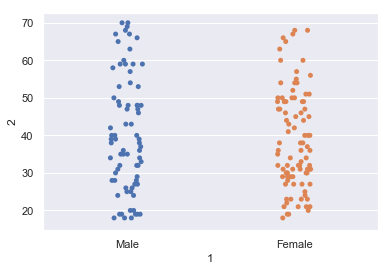

In [33]:
plot = sns.stripplot(x =1, y = 2, data = df1)

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
# changing columns using .columns() 
df1.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 
                'Spending Score (1-100)'] 

In [38]:
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,21,Male,35,24,35
1,22,Male,25,24,73
2,23,Female,46,25,5
3,24,Male,31,25,73
4,25,Female,54,28,14


In [252]:
'''
# outlier range can be detected using Z-score (after 3rd standard deviatio treated as oulier)and 
#IQR - inter quantile range(shulb in range of 25 percentile to 75 percntile)

#using  Zscore - formula z= (x - mu)/sigma ,where mu is mean and sigma SD
outlier = []
def detect_outliers(df):
    
    threshold=3
    mean = np.mean(df)
    std=np.std(df)
    
    for i in df:
        Z_score=(i-mean)/std
        if np.abs(Z_score) > threshold :
            outliers.append(y)
    return outlier
    
'''

In [187]:
df.groupby('Gender').size() # to check how may different elements are there in ech feature

Gender
Female    112
Male       88
dtype: int64

In [ ]:
# to select the dependent and indepent variable using loc function
'''
yVar = data['Creditability']
xVar = data.loc[:, data.columns != 'Creditability']
'''   

In [39]:
#  so lets consider only the true_index values and dropping the false index values
# this depends on the buisness scenerious we can drop, replace with measuse of central tendency(mean,median,mode)
 
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,21,Male,35,24,35
1,22,Male,25,24,73
2,23,Female,46,25,5
3,24,Male,31,25,73
4,25,Female,54,28,14
5,26,Male,29,28,82
6,27,Female,45,28,32
7,28,Male,35,28,61
8,29,Female,40,29,31
9,30,Female,23,29,87


In [61]:
df1=pd.DataFrame(df1)
type(df1)
df1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,21,35,24,35,0
1,22,25,24,73,0
2,23,46,25,5,1
3,24,31,25,73,0
4,25,54,28,14,1
5,26,29,28,82,0
6,27,45,28,32,1
7,28,35,28,61,0
8,29,40,29,31,1
9,30,23,29,87,1


In [60]:
m = pd.get_dummies(df1,columns=['Gender'])


KeyError: "None of [Index(['Gender'], dtype='object')] are in the [columns]"

In [56]:
import pandas as pd
# Importing the cleaned data set  dataset
X = df1.iloc[:,[4,2]].values
# y = dataset.iloc[:, 3].values


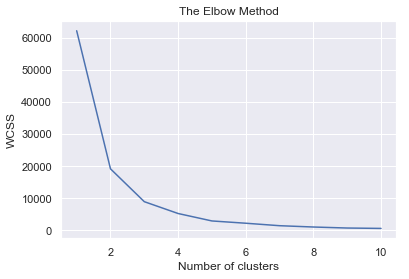

In [43]:


# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




In [44]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

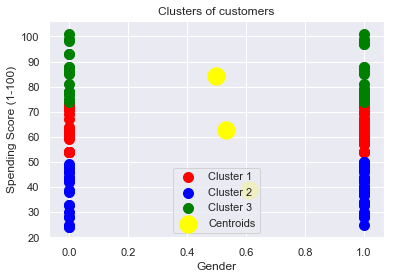

In [45]:
# Visualising the clusters by comapring 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

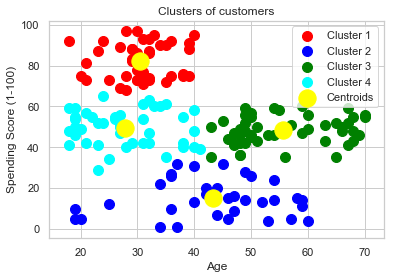

In [351]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

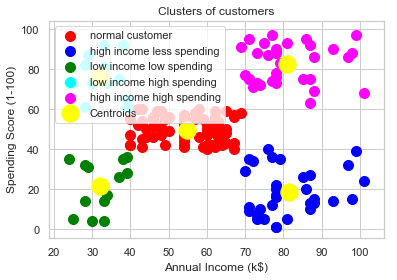

In [336]:
# renaming cluster names
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'normal customer')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'high income less spending')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'low income low spending')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'low income high spending')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'high income high spending')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()